Demonstrate that Scan.read subtracts the input phase 

In [1]:
import importlib
from mkids import TopSoc
import numpy as np
import matplotlib.pyplot as plt
import Scan
soc = TopSoc()

In [2]:
importlib.reload(Scan)
scan = Scan.Scan(soc)

In [3]:
fMixer = soc.fsIn/2/2
soc.set_mixer(fMixer)

614.4

In [4]:
fTone = fMixer + soc.fsOut/np.pi + 0.523
#fTone = 500.3
print("fTone =",fTone)
inCh,inOffset = soc.inFreq2chOffset(fTone)
outCh,outOffset = soc.outFreq2chOffset(fTone)
print("fTone = %.6f MHz"%fTone)
print("  inCh=%4d    inOffset=%+.6f"%(inCh, inOffset))
print(" outCh=%4d   outOffset=%+.6f"%(outCh, outOffset))

fTone = 1006.062188142642
fTone = 1006.062188 MHz
  inCh= 326    inOffset=+0.462188
 outCh= 163   outOffset=+0.462188


In [5]:
importlib.reload(Scan)
scan = Scan.Scan(soc)
tones = np.array([fTone, fTone+12.345])
amplitudes = 0.9*np.ones(len(tones))/len(tones)
fis = 1.2*np.ones(len(tones))
scan.setTones(tones, amplitudes, fis)
decimation=2
scan.prepRead(decimation)


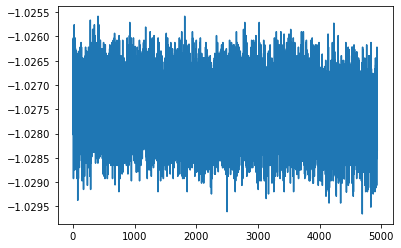

In [6]:
x = scan.readAndUnpack()
plt.plot(np.angle(x[0][0]))


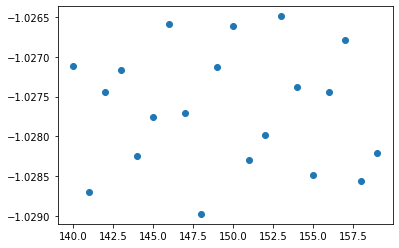

In [7]:
iSample = np.arange(len(x[0][0]))
iBeg = 140
iEnd = 160
plt.plot(iSample[iBeg:iEnd],np.angle(x[0][0][iBeg:iEnd]), "o")

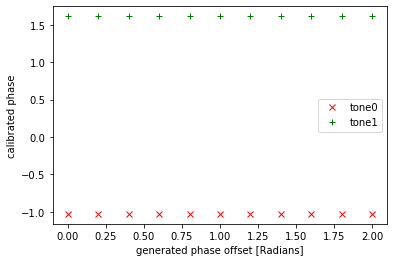

In [8]:
tones = np.array([fTone, fTone+12.345])
amplitudes = 0.9*np.ones(len(tones))/len(tones)

nt = 3
nsamp=10000
iBegin = 155
average = True
subtractInputPhase = True

for dphi in np.linspace(0,2,11):
    fis = 0.1*np.arange(len(tones)) + dphi
    scan.setTones(tones, amplitudes, fis)
    decimation=2
    scan.prepRead(decimation)
    xsa = scan.readAndUnpack(nt, nsamp, average, subtractInputPhase, iBegin)
    pt0, = plt.plot(dphi, np.angle(xsa[0]), 'rx', label="tone0")
    pt1, = plt.plot(dphi, np.angle(xsa[1]), 'g+', label="tone1")
    
plt.xlabel("generated phase offset [Radians]")
plt.ylabel("calibrated phase")
plt.legend(handles=[pt0, pt1])

In [11]:
# Now try it in the second Nyquist zone
fMixer = 0.75*soc.fsIn
soc.set_mixer(fMixer)
print(soc.nZone)

2


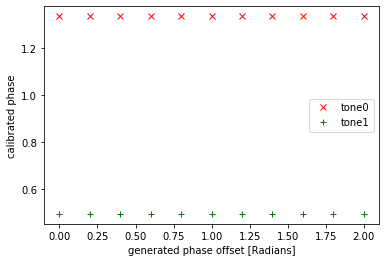

In [12]:
fTone = fMixer + 123.45
tones = np.array([fTone, fTone+12.345])
amplitudes = 0.9*np.ones(len(tones))/len(tones)

nt = 3
nsamp=10000
iBegin = 155
average = True
subtractInputPhase = True

for dphi in np.linspace(0,2,11):
    fis = 0.1*np.arange(len(tones)) + dphi
    scan.setTones(tones, amplitudes, fis)
    decimation=2
    scan.prepRead(decimation)
    xsa = scan.readAndUnpack(nt, nsamp, average, subtractInputPhase, iBegin)
    pt0, = plt.plot(dphi, np.angle(xsa[0]), 'rx', label="tone0")
    pt1, = plt.plot(dphi, np.angle(xsa[1]), 'g+', label="tone1")
    
plt.xlabel("generated phase offset [Radians]")
plt.ylabel("calibrated phase")
plt.legend(handles=[pt0, pt1])